<a href="https://colab.research.google.com/github/Arvind-Khoda/ML_Lab/blob/main/knn_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset
data=pd.read_csv("/content/kc_house_data.csv")

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Finding null values
data.isnull().mean()*100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

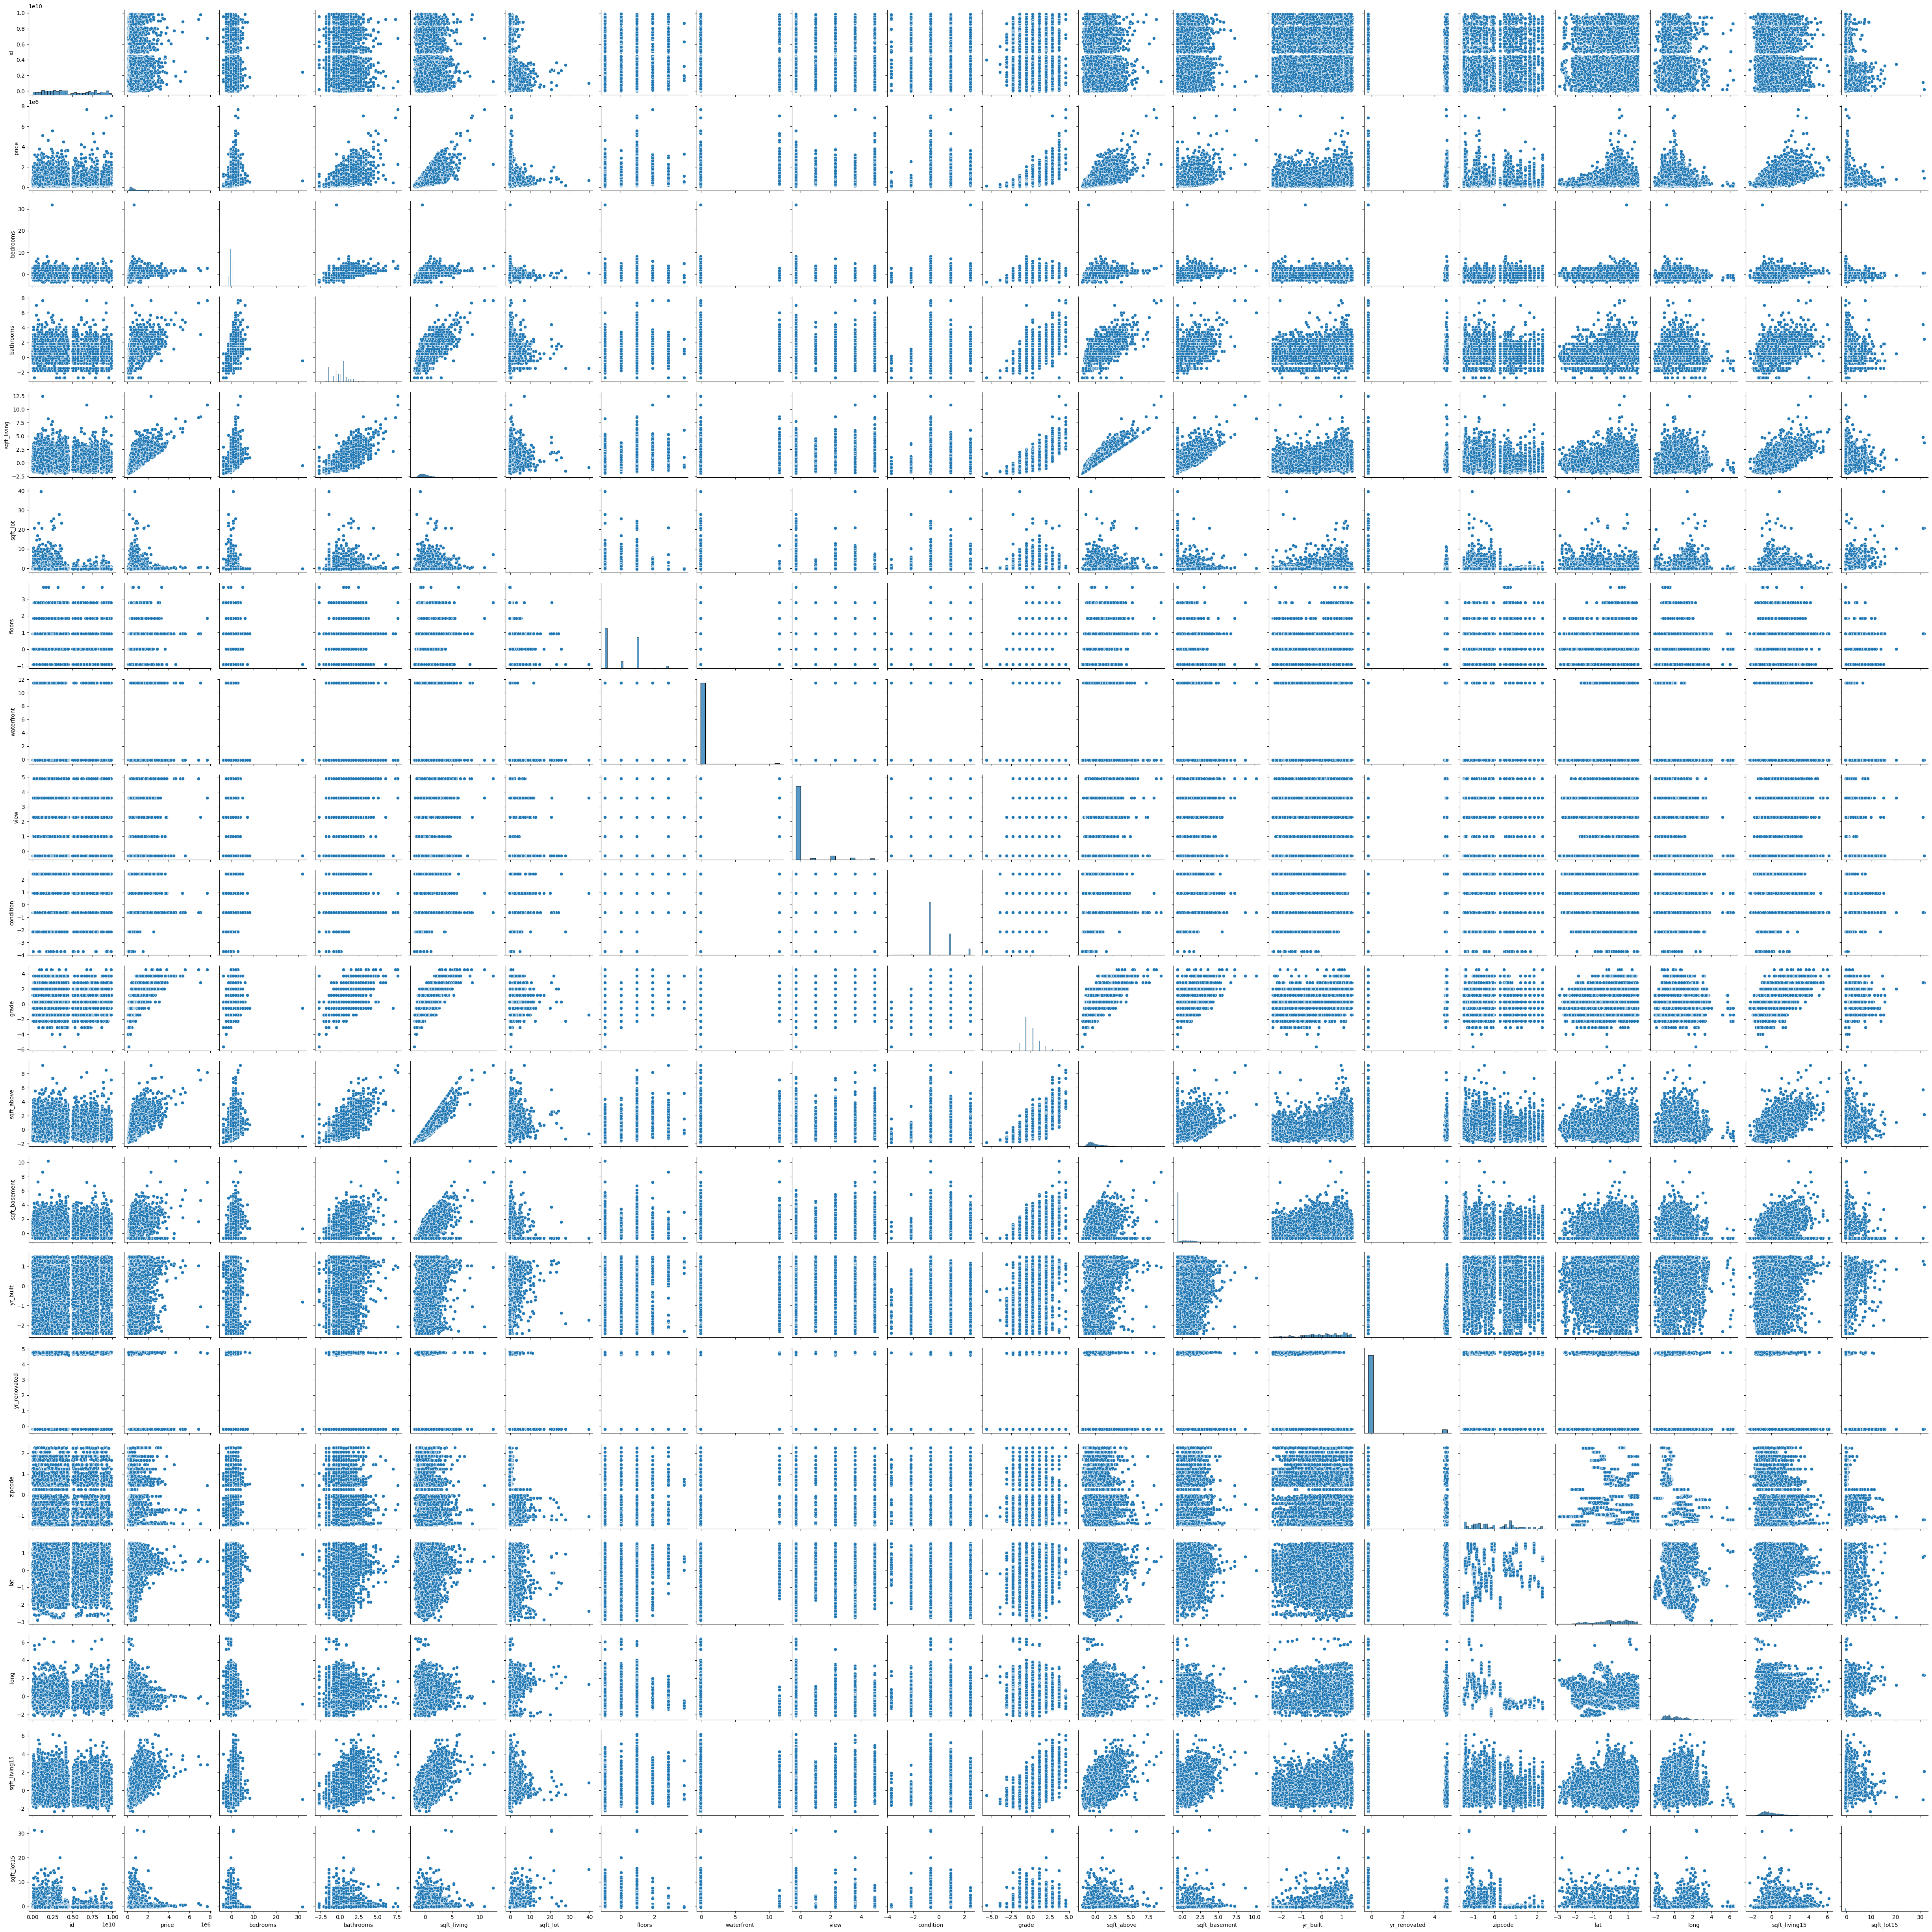

In [28]:
sns.pairplot(data)

In [8]:
#Finding duplicate values
data.duplicated().sum()

0

In [9]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
#Features
feature=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

target=data['price']


In [15]:
#Standarization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

for col in feature:
  data[col]=scaler.fit_transform(np.array(data[col]).reshape(len(data[col]),1))

In [16]:
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0 -0.398737  -1.447464   
1      6414100192  20141209T000000  538000.0 -0.398737   0.175607   
2      5631500400  20150225T000000  180000.0 -1.473959  -1.447464   
3      2487200875  20141209T000000  604000.0  0.676485   1.149449   
4      1954400510  20150218T000000  510000.0 -0.398737  -0.149007   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0 -0.398737   0.500221   
21609  6600060120  20150223T000000  400000.0  0.676485   0.500221   
21610  1523300141  20140623T000000  402101.0 -1.473959  -1.772078   
21611   291310100  20150116T000000  400000.0 -0.398737   0.500221   
21612  1523300157  20141015T000000  325000.0 -1.473959  -1.772078   

       sqft_living  sqft_lot    floors  waterfront      view  ...     grade  \
0        -0.979835 -0.228321 -0.915427   -0.087173 -0.305759  ... -0.558836   
1         0.533634 -0.189885  0.936506   -0.087173 -0.305759  ... -0.558836   
2        -1.426254 -0.123298 -0.915427   -0.087173 -0.305759  ... -1.409587   
3        -0.130550 -0.244014 -0.915427   -0.087173 -0.305759  ... -0.558836   
4        -0.435422 -0.169653 -0.915427   -0.087173 -0.305759  ...  0.291916   
...            ...       ...       ...         ...       ...  ...       ...   
21608    -0.598746 -0.337424  2.788439   -0.087173 -0.305759  ...  0.291916   
21609     0.250539 -0.224386  0.936506   -0.087173 -0.305759  ...  0.291916   
21610    -1.154047 -0.332137  0.936506   -0.087173 -0.305759  ... -0.558836   
21611    -0.522528 -0.307076  0.936506   -0.087173 -0.305759  ...  0.291916   
21612    -1.154047 -0.338752  0.936506   -0.087173 -0.305759  ... -0.558836   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
0       -0.734708      -0.658681 -0.544898     -0.210128  1.870152 -0.352572   
1        0.460841       0.245141 -0.681079      4.746678  0.879568  1.161568   
2       -1.229834      -0.658681 -1.293892     -0.210128 -0.933388  1.283537   
3       -0.891699       1.397515 -0.204446     -0.210128  1.085160 -0.283288   
4       -0.130895      -0.658681  0.544548     -0.210128 -0.073636  0.409550   
...           ...            ...       ...           ...       ...       ...   
21608   -0.312039      -0.658681  1.293542     -0.210128  0.468382  1.004958   
21609    0.629908      -0.658681  1.463768     -0.210128  1.272063 -0.356180   
21610   -0.927928      -0.658681  1.293542     -0.210128  1.234683  0.247888   
21611   -0.227505      -0.658681  1.123316     -0.210128 -0.952078 -0.184414   
21612   -0.927928      -0.658681  1.259497     -0.210128  1.234683  0.245723   

           long  sqft_living15  sqft_lot15  
0     -0.306079      -0.943355   -0.260715  
1     -0.746341      -0.432686   -0.187868  
2     -0.135655       1.070140   -0.172375  
3     -1.271816      -0.914174   -0.284522  
4      1.199335      -0.272190   -0.192849  
...         ...            ...         ...  
21608 -0.938069      -0.666135   -0.412381  
21609 -1.051685      -0.228419   -0.203946  
21610 -0.604321      -1.410253   -0.394141  
21611  1.028910      -0.841221   -0.420511  
21612 -0.604321      -1.410253   -0.417948  

[21613 rows x 21 columns]

In [17]:
Feature=data[feature]

In [20]:
#Train_Test_Split
from sklearn.model_selection import train_test_split as tts
f_train,f_test,t_train,t_test=tts(Feature,target,test_size=0.4,random_state=34)

In [22]:
#Building KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()

In [23]:
#Training model 
model.fit(f_train,t_train)

KNeighborsRegressor()

In [24]:
#Testing model
y_pred=model.predict(f_test)

In [27]:
#Performance Evaluation
#MSE
from sklearn.metrics import mean_squared_error
print(f"MSE is {mean_squared_error(t_test,y_pred)}")

MSE is 34125734478.29427


In [32]:
#r2_score
from sklearn.metrics import r2_score
print(r2_score(t_test,y_pred)*100)

76.45786943264568


In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

#Training model
dt.fit(f_train,t_train)

DecisionTreeRegressor()

In [34]:
#Testing model
y_dt=dt.predict(f_test)

In [37]:
#Performance Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f"R2 score of dt is {r2_score(t_test,y_dt)*100}")

R2 score of dt is 75.68337111495273


In [43]:
model.score(f_test,t_test)

0.7645786943264569

In [ ]:
+